In [70]:
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
import pandas as pd
data = pd.read_csv('/content/IMDb Movies India.csv', delimiter=',', encoding='latin-1')

In [111]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


<Axes: >

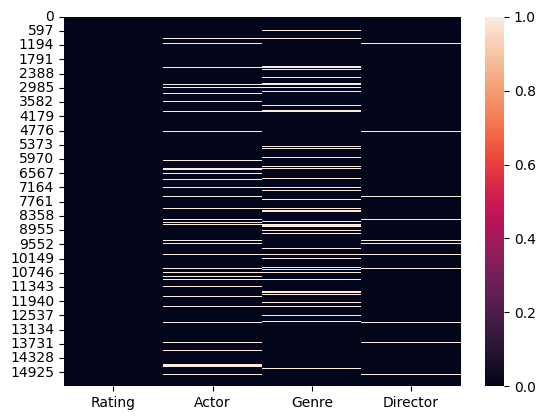

In [106]:
import seaborn as sns
sns.heatmap(data.isnull())


In [113]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [51]:
data.shape


(15509, 10)

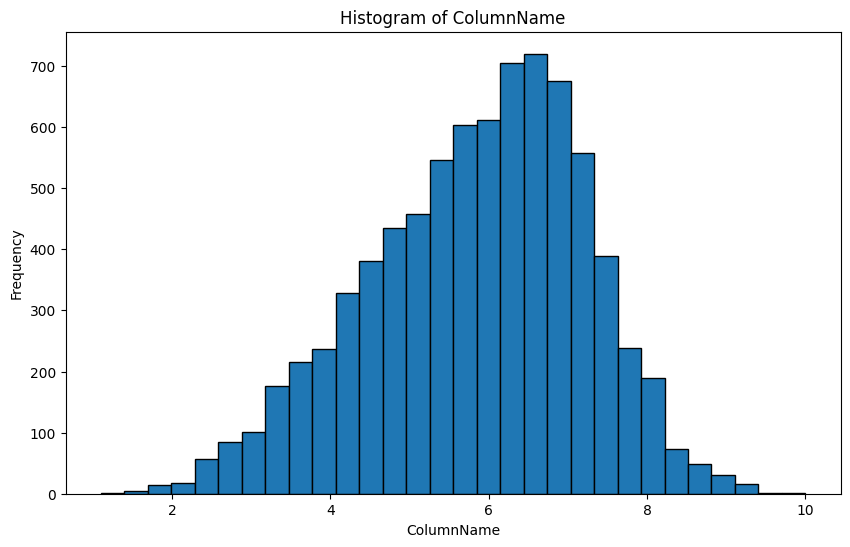

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(data['Rating'], bins=30, edgecolor='k')
plt.title('Histogram of ColumnName')
plt.xlabel('ColumnName')
plt.ylabel('Frequency')
plt.show()

In [53]:
missing_percentage = data.isnull().mean() * 100
print(missing_percentage)

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64


In [74]:
data['Actor 1'] = data['Actor 1'].fillna(data['Actor 2']).fillna(data['Actor 3'])

print(data['Actor 1'].info())
data['Actor']=data['Actor 1']

<class 'pandas.core.series.Series'>
RangeIndex: 15509 entries, 0 to 15508
Series name: Actor 1
Non-Null Count  Dtype 
--------------  ----- 
13892 non-null  object
dtypes: object(1)
memory usage: 121.3+ KB
None


In [75]:
data=data[['Rating','Actor','Genre','Director']]

In [76]:
data

,Rating,Actor,Genre,Director
0,NaN,Manmauji,Drama,J.S. Randhawa
1,7.0,Rasika Dugal,Drama,Gaurav Bakshi
2,NaN,Sayani Gupta,"Drama, Musical",Soumyajit Majumdar
3,4.4,Prateik,"Comedy, Romance",Ovais Khan
4,NaN,Rajat Kapoor,Drama,Amol Palekar
...,...,...,...,...
15504,4.6,Naseeruddin Shah,Action,Mahendra Shah
15505,4.5,Akshay Kumar,"Action, Drama",Kuku Kohli
15506,NaN,Sangeeta Tiwari,Action,Kiran Thej
15507,NaN,NaN,Action,NaN


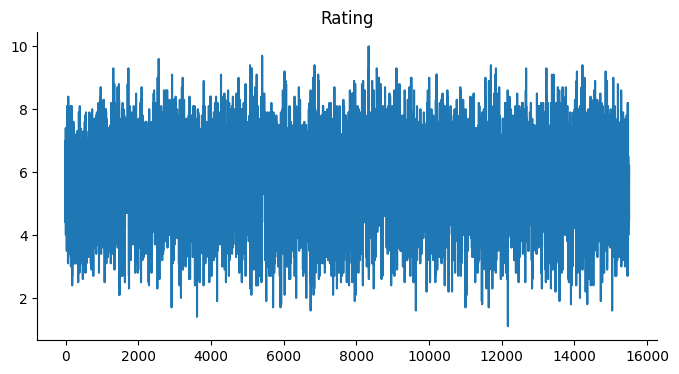

In [80]:
data['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

In [81]:
mean_rating = data['Rating'].mean()
data['Rating'] = data['Rating'].fillna(mean_rating)

In [82]:
data

,Rating,Actor,Genre,Director
0,5.841621,Manmauji,Drama,J.S. Randhawa
1,7.000000,Rasika Dugal,Drama,Gaurav Bakshi
2,5.841621,Sayani Gupta,"Drama, Musical",Soumyajit Majumdar
3,4.400000,Prateik,"Comedy, Romance",Ovais Khan
4,5.841621,Rajat Kapoor,Drama,Amol Palekar
...,...,...,...,...
15504,4.600000,Naseeruddin Shah,Action,Mahendra Shah
15505,4.500000,Akshay Kumar,"Action, Drama",Kuku Kohli
15506,5.841621,Sangeeta Tiwari,Action,Kiran Thej
15507,5.841621,NaN,Action,NaN


In [83]:
data_cleaned = data.dropna()

In [84]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12407 entries, 0 to 15508
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    12407 non-null  float64
 1   Actor     12407 non-null  object 
 2   Genre     12407 non-null  object 
 3   Director  12407 non-null  object 
dtypes: float64(1), object(3)
memory usage: 484.6+ KB


In [86]:
y=data_cleaned['Rating']
x=data_cleaned[['Genre','Director','Actor']]

In [87]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
x['Genre']=le.fit_transform(data_cleaned['Genre'])
x['Director']=le.fit_transform(data_cleaned['Director'])
x['Actor']=le.fit_transform(data_cleaned['Actor'])

<ipython-input-87-d3d4bb0cb155>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Genre']=le.fit_transform(data_cleaned['Genre'])
<ipython-input-87-d3d4bb0cb155>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Director']=le.fit_transform(data_cleaned['Director'])
<ipython-input-87-d3d4bb0cb155>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(x)

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [92]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [93]:
y_pred = model.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [104]:
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error (MSE): 1.1877866925464282
Root Mean Squared Error (RMSE): 1.0898562715085087
Mean Absolute Error (MAE): 0.7452691478658972
R^2 Score: -0.023297898682421936
